In [1]:
import numpy as np
from pya import *
import time
import matplotlib.pyplot as plt

In [2]:
s = Aserver()
s.boot()
# s.set_device(3, reboot = True)

Server Booted


AServer: sr: 44100, blocksize: 256, Stream Active: True
Device: Built-in Output, Index: 1

In [3]:
asine = ugen.sine(dur = 2.)
asine

Asig('sine'): 1 x 88200 @ 44100 Hz = 2.000 s

Asig('sine'): 1 x 88200 @ 44100 Hz = 2.000 s


Asig('sine'): 1 x 88200 @ 44100 Hz = 2.000 s

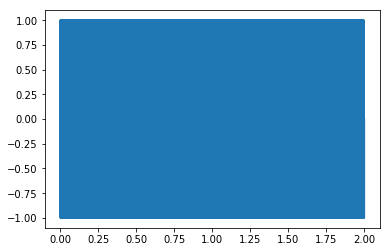

In [7]:
asine.play(server = s).plot()

/Users/jiajunyang/anaconda3/envs/pya/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


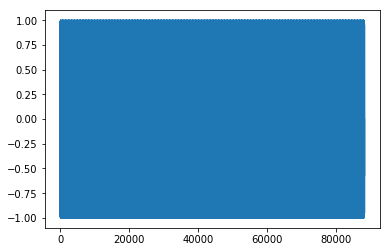

In [8]:
sig = np.sin(2*np.pi*4400*np.linspace(0, 2., 2.*44100))
plt.plot(sig)

In [4]:
astereo = Asig("samples/stereoTest.wav", label='stereo', cn = ['l','r'])
astereo[::, :].play(server = s)
# astereo.plot()
astereo

Asig('stereo_arrayindexed'): 2 x 176400 @ 44100 Hz = 4.000 s


Asig('stereo'): 2 x 176400 @ 44100 Hz = 4.000 s

In [ ]:
astereo[Asig.ts(0,0.6,1),:].play(server = s)


In [ ]:
asen = Asig("samples/sentence.wav", label='sentence')
# asen.play(out = 0,server = s)
asen[:].play(server = s)

In [ ]:
asen = asen * 3

In [ ]:
asen.play(server = s)


In [ ]:
asen.to_mono([0.1, 0.0]).play(server = s)

In [ ]:
asen.to_stereo([0.3, 0.3]).play(server = s)

In [ ]:
asen

In [ ]:

asen.pan2(-1).play(server = s)


In [ ]:

def linlin(x, smi, sma, dmi, dma):
    return (x-smi)/(sma-smi)*(dma-dmi) + dmi
t = time.time()
angle = linlin(0.5, -1, 1, 0, np.pi/2.)
a = np.cos(angle)
b = np.sin(angle)
print (time.time() - t)

In [ ]:
a = np.arange(61632)
newsig = np.repeat(a, 2)
b = newsig.reshape(-1, 2)
print (len(b))

In [ ]:
astereo = Asig("samples/stereoTest.wav", label='stereo')
# astereo.play(server = s)
# astereo.plot()

In [ ]:
astereo[:40000].plot()

In [ ]:
# astereo[:,1].play(server = s)
astereo.play(server = s)

In [ ]:
astereo.plot()

In [ ]:
astereo.pan2(.6).play(server = s)
# astereo.plot()

In [ ]:
astereo


In [ ]:
astereo.route([0.6, .4]).play(server = s)
# astereo.plot()

In [ ]:
a = np.array([1, 2, 3])
b = np.array([20, 30, 40])

In [ ]:
c = np.stack((a,b), axis = 1)

In [ ]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print ('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed


@timeit
def looping(s):
    b = s.copy()
    return

a = looping(np.arange(44100*1000))

In [ ]:
for i, k in enumerate(dictp):
    print (k[0])

In [ ]:
max(dictp, key=lambda x: x[1])[1]

In [ ]:
a = np.array([[1,2],[3,4]])
a = np.concatenate((a, np.zeros((2, 4))), 1)

In [ ]:
@timeit
def add_ch(sig, ch = 3):
    new_sig = np.concatenate((sig, np.zeros((sig.shape[0], ch - sig.shape[1]))), 1)
    return new_sig
@timeit
def add_ch2(sig, ch = 3):
    new_sig = np.zeros((sig.shape[0], ch))
    new_sig[:, :sig.shape[1]] = sig
    return new_sig

In [ ]:
a = np.zeros((10000000, 2))

In [ ]:

b = add_ch(a, ch = 4)
c = add_ch2(a, ch = 4)
# print (b); print (c)

In [ ]:
class myclass():
    def __init__(self, s):
        self.signal = s
        # some others stuff
        
    def __getitem__(self, index):
        print (type(index))
        if isinstance(index, int):
            start, stop, step = 0, index, 1
        elif isinstance(index, slice):
            print (index)
            start, stop, step = index.indices(len(self.signal))    # index is a slice
            self.signal = self.signal[start:stop:step]
            return self
        elif isinstance(index, list) or isinstance(index, np.ndarray):
            self.signal = self.signal[index]
        elif isinstance(index, str):
            return self._[index]
        elif isinstance(index, tuple):
            # tuple is used for channel slicing, [:, :2]
            print (index)
            start0, stop0, step0 = index[0].indices(len(self.signal)) 
            if isinstance(index[1], slice):
                start1, stop1, step1 = index[1].indices(len(self.signal)) 
                self.signal = self.signal[start0:stop0:step0, start1:stop1:step1]
                
            elif isinstance(index[1], list):
                self.signal = self.signal[start0:stop0:step0, index[1]]        
        
            elif isinstance(index[1], int):
                self.signal = self.signal[start0:stop0:step0, index[1]]
                
            return self
        else:
            raise TypeError("index must be int, array, or slice") 


    def shape(self):
        print (self.signal.shape)

In [ ]:
s = np.zeros((1000, 5))
c = myclass(s)

In [ ]:
c.signal.shape

In [ ]:
s[:, [1,3]]

In [ ]:
c[0:500].shape()

In [ ]:
c[:,3].shape()

In [ ]:
a = np.array([[1,2,3],[1,2,3],[1,2,3]])
a

In [ ]:
typ = np.dtype({'names':('left','right','center'),
               'formats':('int16', 'int16', 'int16')})
a.astype(typ)

In [ ]:
b =  np.array([[1,2,3],[1,2,3],[1,2,3]], dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
b

In [ ]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

In [ ]:
for i in data[names]:
    print (i)

In [ ]:
class cl():
    def __init__(self, s):
        self.s = s
        self.shape = len(s)
        
    def __mul__(self, other):
        
        if isinstance(other, cl):
            return cl(self.s * other.s)
        else:
            return cl(self.s * other)
        
    def __rmul__(self, other):
        if isinstance(other, cl):
            return cl(self.s * other.s)
        else:
            return cl(self.s * other)

In [ ]:
s = 4 * np.ones(10)
s2 = 2 * np.ones(10)
c1 = cl(s); c2 = cl(s2)

In [ ]:
c3 = c1 * c2

In [ ]:
dic = {col_names[i]: i for i in range(len(col_names))}
dic.get('left')


In [ ]:
signal =np.ones((100, 3))
signal[:,0] *= np.arange(100)
col_names = ['left','right','center']
# signal = np.array(sigl, dtype = [(n, 'int16') for n in col_names])
@timeit
def addcolname(s, col_names):
    return s.view(dtype=[(n, s.dtype) for n in col_names])
a = addcolname(signal, col_names)

In [ ]:
a

In [ ]:
np.array_equal(a['left'], a[:,0])

In [ ]:
np.array_equal(a['left'], signal[:,0])

In [ ]:
def addcolname2(s, col)

In [ ]:
4/abs(None)